# Runs test example

Here I present an example of a simple non-parametric test to determine whether samples in a series are random.

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

np.random.seed(12)

Define a function to count the number of "runs".

In [2]:
def count_runs(x):
    Npos = 0
    Nneg = 0

    sgn = np.nan
    for val in x:
        if(np.sign(val)!=sgn):
            if(np.sign(val)>0):
                Npos+=1
            else:
                Nneg+=1
            sgn = np.sign(val)

    runs = Npos + Nneg        
    return runs

## Make some synthetic data to orient our brains

Before launching into the calculation I always like to make some synthetic data to play with. So, to begin, let's just grab instances of a random uniform distribution and plot the results, using red for positive values and blue for negative. This will be our synthetic time series. 

We are going to use $N=100$. We will use our ```count_runs()``` function above to count the number of runs and place this in the title

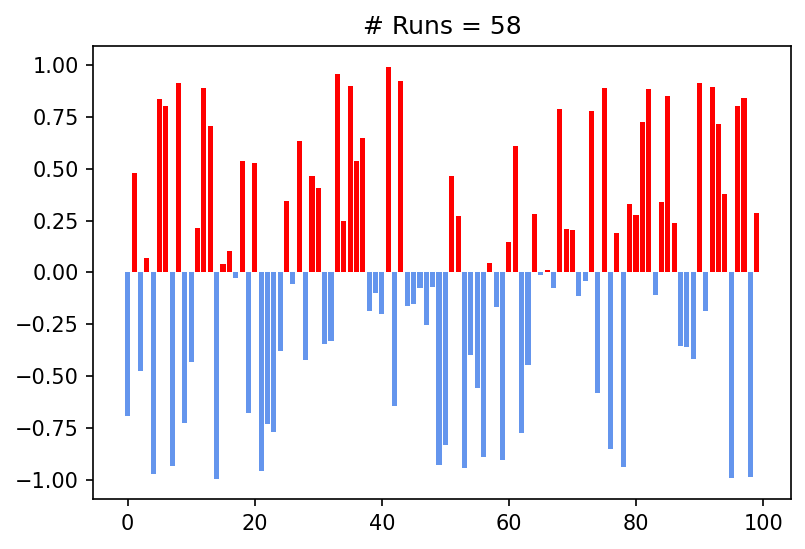

In [3]:
N = 100
x = np.random.uniform(-1.,1.,N)
for i,val in enumerate(x):
    if(val>0):
        plt.bar(i,val, color = 'red')
    else:
        plt.bar(i,val, color = 'cornflowerblue')

runs = count_runs(x)        
plt.title('# Runs = ' + str(runs))        
plt.show()

Next, let's determine the distribution of runs predicted by theory. Specifically, this is a normal distribution with mean of $\mu_{theory}$ and standard deviation of $\sigma_{theory}$ given below. (Note that to compute this we first need to count the number of positive and the number of negative values in our synthetic time series.

In [4]:
Npos = len(np.where(x>0)[0])
Nneg = len(np.where(x<0)[0])
print('# Positive = ' + str(Npos) + ', # Negative = ' + str(Nneg))

#Theory
N = Npos + Nneg
muTheory = 1 + (2*Npos*Nneg)/N
sigmaTheory = np.sqrt((muTheory-1)*(muTheory-2)/(N-1))
print('muTheory = ' + str(muTheory) + ', sigmaTheory = ' + str(sigmaTheory))

# Positive = 50, # Negative = 50
muTheory = 51.0, sigmaTheory = 4.97468338163091


Given that we now have the theoretical normal distribution, let's plot the distribution and look at the range of run counts expected by chance alone. 

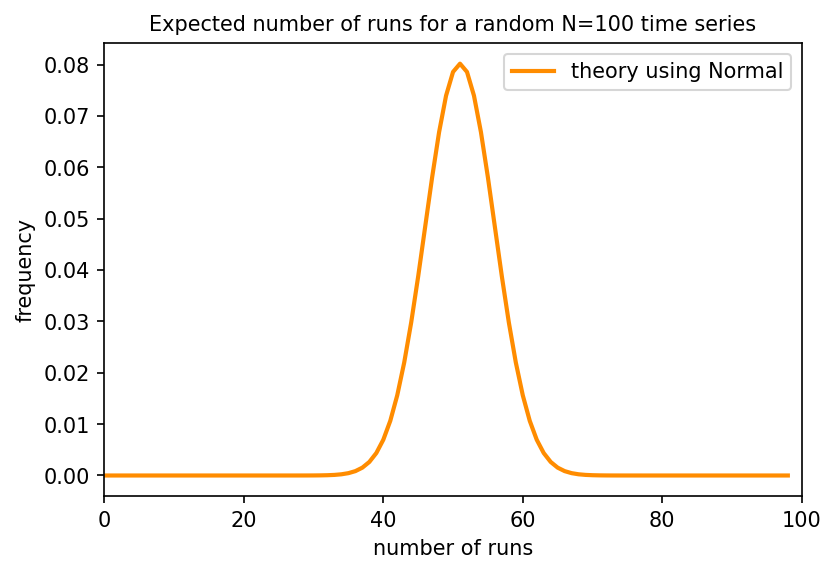

In [5]:
xbins = np.arange(0,N,1)
hx = np.histogram(runs,xbins)
plt.plot(xbins[:-1],stats.norm.pdf(xbins[:-1],loc = muTheory, scale=sigmaTheory),'-',color='darkorange',linewidth=2,label='theory using Normal')
plt.xlim(0,N)
plt.xlabel('number of runs')
plt.ylabel('frequency')
plt.title('Expected number of runs for a random N='+str(N) + ' time series',fontsize=10)
plt.legend()
plt.show()

Ok! This suggests somewhere between 35 and 55 runs or so might be expected frequently by chance alone.

## Using Monte Carlo to check our intuition

Now, you may not be convinced that this distribution shown above is the right one, or you just want to test your intuition to make sure you understand what is going on. So, now, let's compute this theoretical distribution by hand - using Monte Carlo. Hopefully we will come to the same conclusion (*spoiler:* we will).

Now we will create lots of random time series $y$ that are 100 in length. We will do this 2000, mixing it every time and counting the number of runs. I have set the example up this way to ensure we always have exactly the same number of positive and negative values each loop - they are just ordered differently. (The runs test holds for a specific number of positive and negative values.)

In [6]:
N = 100
runs = np.zeros((2000,))
for iloop in np.arange(0,len(runs)):
        y = np.random.uniform(-1.,1.,N)
        runs[iloop] = count_runs(y)
        

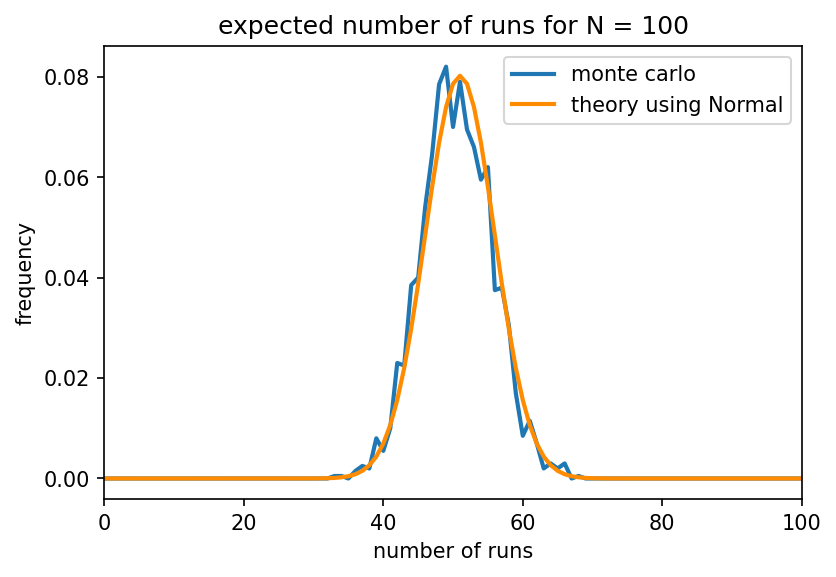

In [7]:
xbins = np.arange(0,600,1)
hx = np.histogram(runs,xbins)
plt.plot(xbins[:-1],hx[0]/len(runs), linewidth=2,label='monte carlo')
plt.plot(xbins[:-1],stats.norm.pdf(xbins[:-1],loc = muTheory, scale=sigmaTheory),'-',color='darkorange',linewidth=2,label='theory using Normal')
plt.xlim(0,N)
plt.xlabel('number of runs')
plt.ylabel('frequency')
plt.title('expected number of runs for N = ' + str(N))
plt.legend()

plt.show()

So cool! It worked. The theoretical distribution of possible runs lines up beautifully with what we got ourselves. 

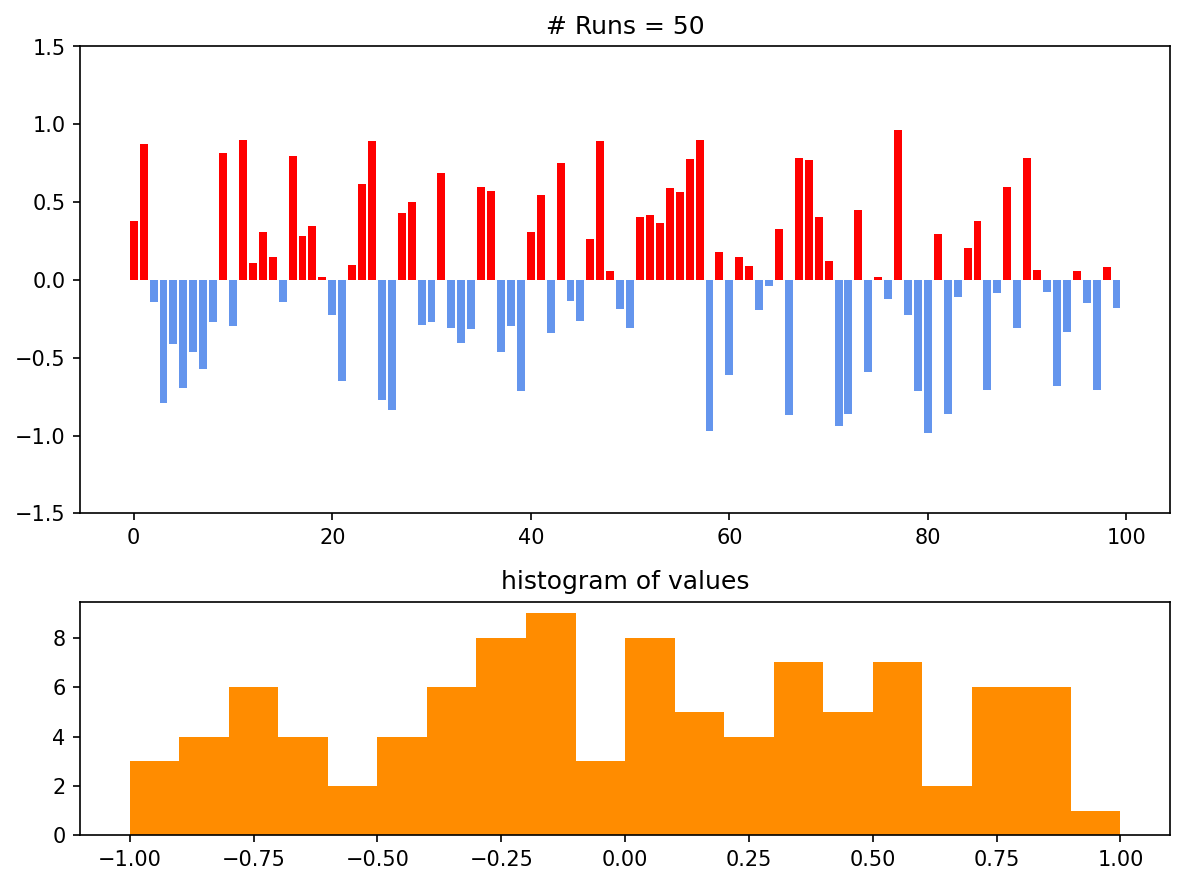

In [8]:
N = 100
rand = 0
x = np.random.uniform(-1.,1.,N)
series = []
for i,v in enumerate(x):
    val = v+rand
    series.append(val)
    if(val>0):
        rand = .0
    else:
        rand = 0.
series = np.asarray(series)        

# plot the figure
spec = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[2, 1])
fig=plt.figure(figsize=(8,6))

ax0 = fig.add_subplot(spec[0])
i = np.where(series>=0)
plt.bar(np.arange(0,N)[i],series[i],color='red')
i = np.where(series<0)
plt.bar(np.arange(0,N)[i],series[i],color='cornflowerblue')
plt.ylim(-1.5,1.5)
plt.title('# Runs = ' + str(count_runs(series)))        

ax1 = fig.add_subplot(spec[1])
plt.hist(series, bins = np.arange(-1,1.1,.1),color='darkorange')
plt.title('histogram of values')

plt.tight_layout()
plt.show()